In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import pickle
import json

In [2]:
#Data Gathering
df=pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#EDA: Exploratory Data Analysis
#missing values
#describe

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

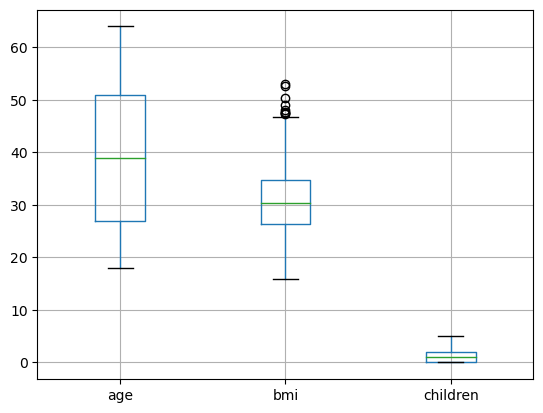

In [5]:
#outliers detection
df[["age","bmi","children"]].boxplot()

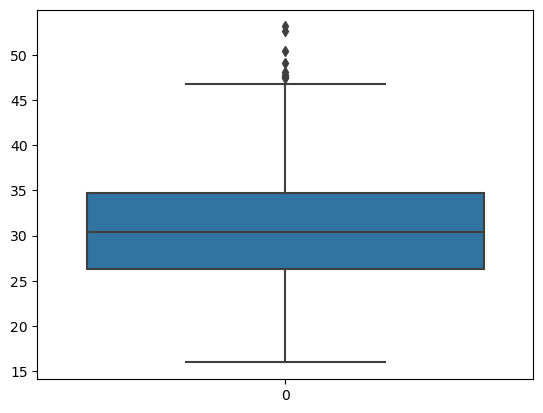

In [6]:
sns.boxplot(df["bmi"])
plt.show()

In [7]:
#handling the outliers
q1=df["bmi"].quantile(0.25)
q2=df["bmi"].quantile(0.50)
q3=df["bmi"].quantile(0.75)

iqr=q3-q1
uppertail=q3+1.5*iqr
outliers=[]
print("Uppertail: ",uppertail)
for i in df["bmi"].values:
    if uppertail<i:
        outliers.append(i)
        
print("Outliers: ",outliers)

Uppertail:  47.290000000000006
Outliers:  [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#now we will find the VIF
df1=df.drop(["charges","sex","smoker","region"],axis=1)
x_constant=sm.add_constant(df1)
vif_list=vif_list = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
s1 = pd.Series(vif_list,index = x_constant.columns)
s1

const       31.954929
age          1.013816
bmi          1.012152
children     1.001874
dtype: float64

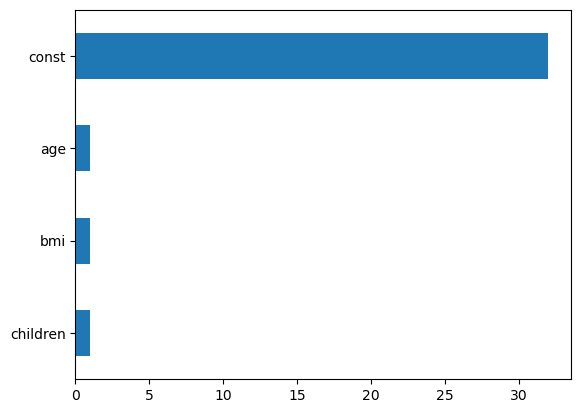

In [11]:
s1 = pd.Series(vif_list,index = x_constant.columns)
s1.sort_values().plot(kind="barh")
plt.show()

In [12]:
#now we have to do the feature engineering
#treatement of missing values
#outliers>>handling it by doing either transformation or imputation
#rename

In [13]:
df.rename(columns={"sex":"gender"},inplace=True)
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df["gender"].replace({"male":0,"female":1},inplace=True)
df["gender"].value_counts()

gender
0    676
1    662
Name: count, dtype: int64

In [15]:
df["smoker"].replace({"yes":1,"no":0},inplace=True)
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [16]:
#encoding
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [17]:
df=pd.get_dummies(df,columns=["region"])

In [18]:
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [19]:
#feature selection
#df.corr
#vif

In [20]:
#data splitting
x=df.drop("charges",axis=1)
y=df["charges"]

In [21]:
x.head()

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,False,False,False,True
1,18,0,33.770,1,0,False,False,True,False
2,28,0,33.000,3,0,False,False,True,False
3,33,0,22.705,0,0,False,True,False,False
4,32,0,28.880,0,0,False,True,False,False


In [22]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
#model selection
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

### prediction on testing data

In [25]:
#Evaluation
# testing
y_pred=lr_model.predict(x_test)

In [26]:
#now we will do the performance metrics

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_pred)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)


MSE:  33596915.85136146
MAE:  33596915.85136146
RMSE:  5796.2846592762735
R2_Score:  0.7835929767120723


In [27]:
adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

adjusted r2 score 0.7760438945043538


### prediction on training data

In [28]:
y_pred_train=lr_model.predict(x_train)

In [29]:
MSE_train=mean_squared_error(y_train,y_pred_train)
MAE_train=mean_squared_error(y_train,y_pred_train)
RMSE_train=np.sqrt(MSE)
R2_Score_train=r2_score(y_train,y_pred_train)
print("MSE: ",MSE_train)
print("MAE: ",MAE_train)
print("RMSE: ",RMSE_train)
print("R2_Score: ",R2_Score_train)

adj_r2_train = 1 - (((1-R2_Score_train)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_train)

MSE:  37277681.70201866
MAE:  37277681.70201866
RMSE:  5796.2846592762735
R2_Score:  0.7417255854683333
adjusted r2 score 0.7327160128683914


### prediction using Reidge Model

In [30]:
r_model=Ridge(alpha=1.0) #alpha is nothing but lambda 
r_model.fit(x_train,y_train)

Ridge()

##### ridge on testing data

In [31]:
y_r_predict=r_model.predict(x_test)

MSE=mean_squared_error(y_r_predict,y_test)
MAE=mean_squared_error(y_test,y_r_predict)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_r_predict)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  33642947.83507097
MAE:  33642947.83507097
RMSE:  5800.254118146115
R2_Score:  0.7832964719788794
adjusted r2 score 0.7757370465827939


##### ridge on training data

In [32]:
y_r_train_predict=r_model.predict(x_train)

MSE=mean_squared_error(y_r_train_predict,y_train)
MAE=mean_squared_error(y_train,y_r_train_predict)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_train,y_r_train_predict)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  37280674.08958883
MAE:  37280674.08958883
RMSE:  6105.790210086556
R2_Score:  0.7417048530323972
adjusted r2 score 0.732694557207946


### Prediction on Lasso Model

In [33]:
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

##### prediction on testing data

In [34]:
y_r_predict=r_model.predict(x_test)

MSE=mean_squared_error(y_r_predict,y_test)
MAE=mean_squared_error(y_test,y_r_predict)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_r_predict)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  33642947.83507097
MAE:  33642947.83507097
RMSE:  5800.254118146115
R2_Score:  0.7832964719788794
adjusted r2 score 0.7757370465827939


##### prediction on training data

In [35]:
y_r_train_predict=lasso_model.predict(x_train)

MSE=mean_squared_error(y_r_train_predict,y_train)
MAE=mean_squared_error(y_train,y_r_train_predict)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_train,y_r_train_predict)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  37277711.06031092
MAE:  37277711.06031092
RMSE:  6105.547564331222
R2_Score:  0.7417253820625582
adjusted r2 score 0.7327158023670661


In [36]:
#checking slope on lasso model for feature selection
lasso_model.coef_

array([ 2.56973787e+02,  1.39773763e+01,  3.36892172e+02,  4.24687204e+02,
        2.36444097e+04,  6.49104379e+02,  2.78116811e+02, -0.00000000e+00,
       -1.52448881e+02])

In [37]:
s1 = pd.Series(lasso_model.coef_,index=x.columns)
s1.sort_values().plot(kind="barh")

<Axes: >

In [38]:
#conclusion from above graph since gender has zero slope so we can drop it

In [39]:
x_train1=df.drop("gender",axis=1)
x_train1.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,False,False,True,False
2,28,33.000,3,0,4449.46200,False,False,True,False
3,33,22.705,0,0,21984.47061,False,True,False,False
4,32,28.880,0,0,3866.85520,False,True,False,False


### Hyperparameter Tuning

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.

In [40]:
np.arange(0.01,3,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

In [41]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
gdsearchCv = GridSearchCV(estimator=estimator_ridge,param_grid=parameter_grid,cv=5)
gdsearchCv.fit(x_train,y_train)
gdsearchCv.best_estimator_

Ridge(alpha=0.9600000000000001)

In [42]:
#Now we will provide the alpha value to the testing data
ridge_model=gdsearchCv.best_estimator_ #alpha =0.96
y_pred_test=ridge_model.predict(x_test) 

MSE=mean_squared_error(y_test,y_pred_test)
MAE=mean_squared_error(y_test,y_pred_test)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  33641004.689312056
MAE:  33641004.689312056
RMSE:  5800.086610500921
R2_Score:  0.7833089883179196
adjusted r2 score 0.7757499995383121


In [43]:
# on training data
ridge_model = gdsearchCv.best_estimator_ # alpha = 0.69
y_pred_train  = ridge_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
MSE=mean_squared_error(y_train,y_pred_train)
MAE=mean_squared_error(y_train,y_pred_train)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_train,y_pred_train)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  37280440.76364111
MAE:  37280440.76364111
RMSE:  6105.771103115569
R2_Score:  0.7417064696061698
adjusted r2 score 0.7326962301738269


### RandomizedSearchCV

In [44]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
rdsearchCv = RandomizedSearchCV(estimator_ridge,parameter_grid,cv=5)
rdsearchCv.fit(x_train,y_train)
rdsearchCv.best_estimator_

Ridge(alpha=0.73)

In [69]:
#Now we will provide the alpha value to the testing data
random_searchcv=rdsearchCv.best_estimator_ #alpha =1.12
y_pred_test=ridge_model.predict(x_test) 

MSE=mean_squared_error(y_test,y_pred_test)
MAE=mean_squared_error(y_test,y_pred_test)
RMSE=np.sqrt(MSE)
R2_Score=r2_score(y_test,y_pred_test)
print("MSE: ",MSE)
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

adj_r2 = 1 - (((1-R2_Score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

MSE:  33641004.689312056
MAE:  33641004.689312056
RMSE:  5800.086610500921
R2_Score:  0.7833089883179196
adjusted r2 score 0.7757499995383121


### Final Model selected based on MSE and R2_Score

In [74]:
with open("Linear_model.pkl","wb") as file:     #creating the pickle file
    pickle.dump(lr_model,file)

In [71]:
project_data={"gender":{"male":0,"female":1},
             "smoker":{"yes":1,"no":0},
              "columns":list(x.columns)
             }

project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [72]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)

In [73]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')